In [86]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import t
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [87]:
data = pd.read_csv("T1.csv")

In [88]:
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645904,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [89]:
data = data[(data["Wind Speed (m/s)"] >= 0) & (data["LV ActivePower (kW)"] >= 0) & (data["Theoretical_Power_Curve (KWh)"]>=0) & (data["Wind Direction (°)"]>=0)]

# In this part we get rid of the values which under 0 because all the data must be greater than 0 or equal to 0

In [90]:
data.drop('Date/Time', axis=1,inplace=True)

In [91]:
scaler = StandardScaler()

scaled_features = scaler.fit_transform(data)

scaled_data = pd.DataFrame(scaled_features,columns=data.columns)

print(scaled_data.head())


   LV ActivePower (kW)  Wind Speed (m/s)  Theoretical_Power_Curve (KWh)  \
0            -0.707923         -0.532828                      -0.787732   
1            -0.651752         -0.447454                      -0.712003   
2            -0.764055         -0.555376                      -0.806322   
3            -0.677752         -0.450410                      -0.714773   
4            -0.707464         -0.469748                      -0.732629   

   Wind Direction (°)  
0            1.459106  
1            1.551633  
2            1.593621  
3            1.579638  
4            1.519883  


# LinearRegression

In [92]:
from sklearn.linear_model import LinearRegression

X = scaled_data.drop(["LV ActivePower (kW)"],axis=1)
y = scaled_data[["LV ActivePower (kW)"]]
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

# Initialize a linear regression model
lin_reg = LinearRegression()

# Fit the model to the training data
lin_reg.fit(X_train, y_train)

# Predict on the test data
y_pred = lin_reg.predict(X_test)

Accuracy_linear = lin_reg.score(X_test, y_test)
print("Accuracy:",Accuracy_linear)

print(100*"*")

kf = KFold(n_splits=6, shuffle=True, random_state=42)

cv_results = cross_val_score(lin_reg,X_test,y_test,cv=kf)
print(cv_results)

print('Mean cross validation test score: ', np.mean(cv_results))


Accuracy: 0.9063602606208756
****************************************************************************************************
[0.92478984 0.91069962 0.91859473 0.8922114  0.88480445 0.90576912]
Mean cross validation test score:  0.9061448582315724


The R^2 score of approximately 0.906 indicates that the linear regression model explains about 90.6% of the variance in the target variable on the test data.

# Making a Linear Regression model: our second model: Ordinary Least Squares (OLS)

In [93]:
X = scaled_data.drop(["LV ActivePower (kW)"],axis=1)
X = sm.add_constant(X)
y = scaled_data[["LV ActivePower (kW)"]]


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

rModel = sm.OLS(y_train, X_train)
# Fit the model
rModel_results = rModel.fit()
# Evaluate the model
rModel_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     LV ActivePower (kW)   R-squared:                       0.905
Model:                             OLS   Adj. R-squared:                  0.905
Method:                  Least Squares   F-statistic:                 1.285e+05
Date:                 Thu, 18 Apr 2024   Prob (F-statistic):               0.00
Time:                         14:18:13   Log-Likelihood:                -9747.6
No. Observations:                40378   AIC:                         1.950e+04
Df Residuals:                    40374   BIC:                         1.954e+04
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.0002      0.002      0.154      0.878      -0.003       0.003
Wind Speed (m/s)                  0.1414      0.005     30.256      0.000       0.132       0.151
Theoretical_Power_Curve (KWh)     0.8191      0.005    174.799      0.000       0.810       0.828
Wind Direction (°)                0.0299      0.002     19.355      0.000       0.027       0.033
==============================================================================
Omnibus:                    38745.469   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1521252.257
Skew:                          -4.821   Prob(JB):                         0.00
Kurtosis:                      31.482   Cond. No.                         5.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Random Forests

In [94]:


X = scaled_data.drop(["LV ActivePower (kW)"],axis=1)

y = scaled_data[["LV ActivePower (kW)"]]


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)


# Initialize Random Forest Regressor model
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred_rf_reg = rf_reg.predict(X_test)

Accuracy_random = rf_reg.score(X_test, y_test)

print("Accuracy:",Accuracy_random)

print(100*"*")
kf = KFold(n_splits=6, shuffle=True, random_state=42)

cv_results = cross_val_score(rf_reg,X_test,y_test,cv=kf)
print(cv_results)

print('Mean cross validation test score: ', np.mean(cv_results))

C:\Users\16088\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9057066175716569
****************************************************************************************************


C:\Users\16088\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\16088\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\16088\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\16088\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

[0.91669891 0.91192033 0.91103348 0.88319157 0.89382383 0.90717581]
Mean cross validation test score:  0.9039739874816263


# Support Vector Regression

In [95]:
X = scaled_data.drop(["LV ActivePower (kW)"],axis=1)

y = scaled_data[["LV ActivePower (kW)"]]


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

# Initialize Support Vector Regressor model
svr_reg = SVR()
svr_reg.fit(X_train, y_train)

y_pred_svr_reg = svr_reg.predict(X_test)

Accuracy_support = svr_reg.score(X_test, y_test)

print("Accuracy:",Accuracy_support)

print(100*"*")
kf = KFold(n_splits=6, shuffle=True, random_state=42)

cv_results = cross_val_score(svr_reg,X_test,y_test,cv=kf)
print(cv_results)

print('Mean cross validation test score: ', np.mean(cv_results))

C:\Users\16088\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9073254638427982
****************************************************************************************************


C:\Users\16088\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\16088\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\16088\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\16088\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[0.92740546 0.91160039 0.92201948 0.8937483  0.88279485 0.90539914]
Mean cross validation test score:  0.9071612702165907


# Ridge regression

In [96]:
X = scaled_data.drop(["LV ActivePower (kW)"],axis=1)

y = scaled_data[["LV ActivePower (kW)"]]


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

scores = []

for i in [0.1, 1, 10, 100, 1000]:
    
    ridge = Ridge(alpha=i)
    ridge.fit(X_train,y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test,y_test))
    
print(scores)

# if i = 1, we take the best result

Accuracy_ridge = max(scores)

print("Max_score:",max(scores))


[0.9063602632582332, 0.9063602844258494, 0.9063602439509687, 0.9063366270487329, 0.9049453446070965]
Max_score: 0.9063602844258494


# Lasso Regression

In [97]:
X = scaled_data.drop(["LV ActivePower (kW)"],axis=1)

y = scaled_data[["LV ActivePower (kW)"]]


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

scores = []

for i in [0.1, 1, 10, 100, 1000]:
    
    lasso = Lasso(alpha=i)
    lasso.fit(X_train,y_train)
    y_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test,y_test))
print(scores)

Accuracy_lasso = max(scores)

print("Max_score:",max(scores))

[0.8951841269063548, -6.267660608250125e-05, -6.267660608250125e-05, -6.267660608250125e-05, -6.267660608250125e-05]
Max_score: 0.8951841269063548


# 7.Comparison of the models

In [100]:
my_labels = ["LinearRegression","Random Forests","Support Vector Regression","Ridge regression","Lasso Regression"]
Accuracy_score = [Accuracy_linear,Accuracy_random,Accuracy_support,Accuracy_ridge,Accuracy_lasso]

score_tab_acc = pd.DataFrame(list(zip(my_labels, Accuracy_score)), 
               columns =['Algorithm', 'Model accuracy score']) 
print(score_tab_acc)

                   Algorithm  Model accuracy score
0           LinearRegression              0.906360
1             Random Forests              0.905707
2  Support Vector Regression              0.907325
3           Ridge regression              0.906360
4           Lasso Regression              0.895184


C:\Users\16088\AppData\Local\Temp\ipykernel_11464\2341945298.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap='plasma'), label='Accuracy Score')


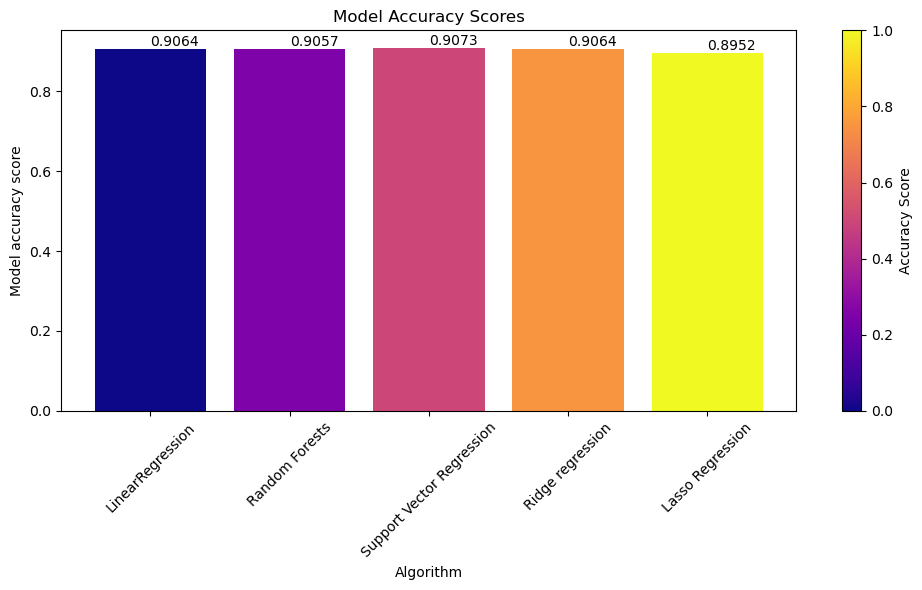

In [101]:
colors = plt.cm.plasma(np.linspace(0, 1, len(my_labels)))


plt.figure(figsize=(10, 6))
bars = plt.bar(my_labels, Accuracy_score, color=colors)


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom')

plt.xlabel('Algorithm')
plt.ylabel('Model accuracy score')
plt.title('Model Accuracy Scores')

plt.colorbar(plt.cm.ScalarMappable(cmap='plasma'), label='Accuracy Score')


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Applying Grid search CV for hyperparameter Tuning:
# Parameter Tuning for Ridge:

Hyperparameter tuning: 
Ridge/Lasso regression: Choosing alpha
Hyperparameters: Parameters we specify before fitting the model
Like alpha and n_neighbors.

In [102]:
X = scaled_data.drop(["LV ActivePower (kW)"],axis=1)

y = scaled_data[["LV ActivePower (kW)"]]


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {"alpha" : np.arange(0.0001,1,10),
              "solver": ["sag","lsqr"]}

ridge = Ridge()
ridge_cv = GridSearchCV(ridge,param_grid,cv=kf)
ridge_cv.fit(X_train,y_train)

print(ridge_cv.best_params_,ridge_cv.best_score_)

test_score = ridge_cv.score(X_test,y_test)
print(test_score)

{'alpha': 0.0001, 'solver': 'lsqr'} 0.9051485001612816
0.9063602606235416


# Applying RandomizedSearchCV

In [103]:
X = scaled_data.drop(["LV ActivePower (kW)"],axis=1)

y = scaled_data[["LV ActivePower (kW)"]]


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {"alpha" : np.arange(0.0001,1,10),
              "solver": ["sag","lsqr"]}

ridge = Ridge()
ridge_cv = RandomizedSearchCV(ridge,param_grid,cv=kf)
ridge_cv.fit(X_train,y_train)

print(ridge_cv.best_params_,ridge_cv.best_score_)

test_score = ridge_cv.score(X_test,y_test)
print(test_score)

C:\Users\16088\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'solver': 'lsqr', 'alpha': 0.0001} 0.9051485001612816
0.9063602606235416


# Conclusion

In this project our target variable is continous variable. Because of this reason, we used regression models instead of classification models. We used these models:
    LinearRegression
    Random Forests
    Support Vector Regression
    Ridge regression
    Lasso Regression
We splitted the data like that %80 of the data are used for training. Our data actually involve in a time series. 0.8 is enough for training.
We have evaluated each models in terms of model accuracy score and plotted them. The best model is Support Vector Regression.


#  Future Direction

Here we have used only the data of one year. The model can be improved, if we can use the data from another year.